## Imports

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as BS
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True)

## Get Url Page Content

In [2]:
url = 'http://store.steampowered.com/stats/'

In [3]:
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36'}

In [4]:
d = requests.get(url, headers=headers)

In [5]:
d.status_code

200

In [6]:
stat = BS(d.content, 'html.parser')

In [7]:
stat

<!DOCTYPE html>

<html class=" responsive" lang="en">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type">
<meta content="width=device-width,initial-scale=1" name="viewport">
<meta content="#171a21" name="theme-color">
<title>Steam: Game and Player Statistics</title>
<link href="/favicon.ico" rel="shortcut icon" type="image/x-icon">
<link href="http://store.akamai.steamstatic.com/public/shared/css/motiva_sans.css?v=Sd0odMs2NjL1" rel="stylesheet" type="text/css">
<link href="http://store.akamai.steamstatic.com/public/shared/css/shared_global.css?v=aXnR3BCCrqcR" rel="stylesheet" type="text/css">
<link href="http://store.akamai.steamstatic.com/public/shared/css/buttons.css?v=FMXZx9fv9yp_" rel="stylesheet" type="text/css">
<link href="http://store.akamai.steamstatic.com/public/css/v6/store.css?v=5s8fDGAR45RW" rel="stylesheet" type="text/css">
<link href="http://store.akamai.steamstatic.com/public/css/styles_stats.css?v=x_ujB7oTtKSD" rel="stylesheet" type="text/css">
<

## Locate Target

In [8]:
# stats of a game
stat.find_all('tr', {'class':'player_count_row'})[0].find_all('span')

[<span class="currentServers">735,307</span>,
 <span class="currentServers">802,784</span>]

In [9]:
# game name
stat.find_all('tr', {'class':'player_count_row'})[0].find('a').get_text()

'Dota 2'

In [10]:
# length of the entire table
len_stat = len(stat.find_all('tr', {'class':'player_count_row'}))
len_stat

100

## Retrieve

### Dict/List Building

In [11]:
# store data into a dict with 3 keys: game, current_players, peak_today
d_stat = {'game':[],
         'current_players':[],
         'peak_today':[]}

### Get Data

In [12]:
# game
for i in range(len_stat):
    g = stat.find_all('tr', {'class':'player_count_row'})[i].find('a').get_text()
    d_stat['game'].append(g)
print(d_stat['game'][:5])
print(len(d_stat['game']))

['Dota 2', 'Counter-Strike: Global Offensive', 'H1Z1: King of the Kill', 'Grand Theft Auto V', 'Team Fortress 2']
100


In [13]:
# current_players, peak_today
for i in range(len_stat):
    n1 = int(stat.find_all('tr', {'class':'player_count_row'})[i].find_all('span')[0].get_text().replace(',', ''))
    n2 = int(stat.find_all('tr', {'class':'player_count_row'})[i].find_all('span')[1].get_text().replace(',', ''))
    d_stat['current_players'].append(n1)
    d_stat['peak_today'].append(n2)
print(d_stat['current_players'][:5], len(d_stat['current_players']))
print(d_stat['peak_today'][:5], len(d_stat['peak_today']))

[735307, 555327, 91574, 74829, 52963] 100
[802784, 639448, 112455, 85417, 57194] 100


## Tabulate

In [14]:
df = pd.DataFrame(d_stat)
df.head()

,current_players,game,peak_today
0,735307,Dota 2,802784
1,555327,Counter-Strike: Global Offensive,639448
2,91574,H1Z1: King of the Kill,112455
3,74829,Grand Theft Auto V,85417
4,52963,Team Fortress 2,57194


In [15]:
df = df[['game', 'current_players', 'peak_today']]
df.head()

,game,current_players,peak_today
0,Dota 2,735307,802784
1,Counter-Strike: Global Offensive,555327,639448
2,H1Z1: King of the Kill,91574,112455
3,Grand Theft Auto V,74829,85417
4,Team Fortress 2,52963,57194


## Simple Visualization

We can see that only the top 2 games have a lot of current players

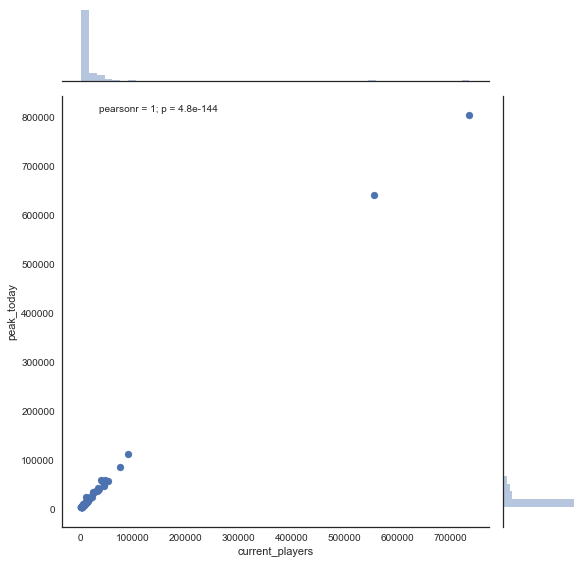

In [17]:
sns.jointplot(data=df, x='current_players', y='peak_today', size=8)